In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 13 Notebook

In this lecture we introduce more complex boolean expressions, conditionals, and for loops.

<br><br><br><br>

---

## Boolean expressions

We have already seen basic boolean expressions before

In [2]:
3 > 1

True

In [3]:
type(3 > 1)

bool

In [4]:
type(True)

bool

Recall that single `=` is **assignment**.  Thus the following is an error:

```python
3 = 3.0
```

Equality:

In [5]:
3 == 3.0

True

Inequality: 

In [6]:
10 != 2

True

Using variables in boolean expressions:

In [7]:
x = 14
y = 3

In [8]:
x > 15

False

In [9]:
12 < x

True

In [10]:
x < 20

True

Compound boolean expressions:

In [11]:
12 < x < 20

True

(The comparison `12 < x < 20` is equivalent to `12 < x and x < 20`.)

In [12]:
12 < x and x < 20

True

In [13]:
x > 13 and y < 3.14159

True

In [14]:
10 < x-y < 13

True

<br><br>

---

<center> return to slides </center>

---

<br><br><br><br>

---

## Boolean Expressions with Arrays

Just as arrays can be used in mathematical expressions we can also apply boolean operations to arrays.  They are applied element-wise.

In [15]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')
pets

array(['cat', 'cat', 'dog', 'cat', 'dog', 'rabbit'],
      dtype='<U6')

In [16]:
pets == 'cat'

array([ True,  True, False,  True, False, False], dtype=bool)

How many cats?

In [17]:
sum(pets == 'cat')

3

Math with booleans

In [18]:
is_cat = pets == "cat"
is_cat

array([ True,  True, False,  True, False, False], dtype=bool)

In [19]:
is_cat * 2 - 1

array([ 1,  1, -1,  1, -1, -1])

In [20]:
np.mean(is_cat)

0.5

<br><br>

---

<center> return to slides </center>

---

<br><br>

<br><br><br><br>

---
## Rows & Apply

Just as we can access individual columns in a table we can also access individual rows. 

In [21]:
survey = Table.read_table('welcome_survey_sp23.csv')
survey.show(3)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second Year,2,5,9,Right-handed,Right leg in first,On your right side,"Cat, Dog, Fish, Snake, Lizard",-3
First Year,2,3,8,Right-handed,I don't know,On your back,None,-1
First Year,5,5,8,Right-handed,Right leg in first,On your left side,Bearded dragon,0


In [22]:
r = survey.row(0)
r

Row(Year='Second Year', Extraversion=2, Number of textees=5, Hours of sleep=9.0, Handedness='Right-handed', Pant leg='Right leg in first', Sleep position='On your right side', Pets='Cat, Dog, Fish, Snake, Lizard', Piercings=-3)

In [23]:
type(r)

datascience.tables.Row

Getting a field from a row

In [24]:
r.item('Year')

'Second Year'

### Math On Rows

Suppose we get a row that contains only numbers:

In [25]:
r2 = survey.select("Extraversion", "Number of textees", "Hours of sleep").row(2)
r2

Row(Extraversion=5, Number of textees=5, Hours of sleep=8.0)

We can apply aggregation functions to that row

In [26]:
sum(r2)

18.0

Recall that if we wanted to **apply** a function to all the rows of a table we use `apply`

In [27]:
(
    survey
    .select("Extraversion", "Number of textees", "Hours of sleep")
    .apply(sum)
)


array([ 16.,  13.,  18., ...,  20.,  29.,  14.])

Let's use this insight to improve our pivot table:

In [28]:
p = survey.pivot("Sleep position", "Hours of sleep")
p.show()

Hours of sleep,On your back,On your left side,On your right side,On your stomach
3,1,2,0,1
4,2,4,2,1
4.5,0,0,1,0
5,19,11,25,7
5.5,0,0,1,0
6,71,95,102,25
6.5,8,11,4,0
7,123,165,210,68
7.5,7,10,20,7
8,107,116,137,53


<br><br><br>
**Exercise:** Add the row totals to the table:

In [29]:
p.with_column("Total", p.drop("Hours of sleep").apply(np.sum)).show()

Hours of sleep,On your back,On your left side,On your right side,On your stomach,Total
3,1,2,0,1,4
4,2,4,2,1,9
4.5,0,0,1,0,1
5,19,11,25,7,62
5.5,0,0,1,0,1
6,71,95,102,25,293
6.5,8,11,4,0,23
7,123,165,210,68,566
7.5,7,10,20,7,44
8,107,116,137,53,413


<details><summary>Click for Solution</summary>

```python
p.with_column("Total", p.drop("Hours of sleep").apply(np.sum)).show()
```

</details>

<br><br><br>
**Exercise:** Do the same thing with a `group` and a `join`:

In [30]:
p.join("Hours of sleep", survey.group("Hours of sleep")).show()

Hours of sleep,On your back,On your left side,On your right side,On your stomach,count
3,1,2,0,1,4
4,2,4,2,1,9
4.5,0,0,1,0,1
5,19,11,25,7,62
5.5,0,0,1,0,1
6,71,95,102,25,293
6.5,8,11,4,0,23
7,123,165,210,68,566
7.5,7,10,20,7,44
8,107,116,137,53,413


<details><summary>Click for Solution</summary>
    
```python
p.join("Hours of sleep", survey.group("Hours of sleep")).show()
```

</details>

<br><br>

---

<center> return to slides </center>

---

<br><br>

<br><br><br><br>

---

## Conditional Statements

Conditional statements in python allow us to do different things based on the values in our data

In [31]:
x = 20

If the value of x is greater than or equal to 18 then print 'You can legally vote.'

In [32]:
if x >= 18:
    print('You can legally vote.')

You can legally vote.


Conditionals consist of two main parts:

```python

if boolean expression here :
    # body of the if statement goes here and must be indented
```

Notice than if the boolean expression is False than the body of the if statement is not executed:

In [33]:
print("Can you drink?")

if x >= 21:
    print('You can legally drink.')
    print("This line of code is never run...")
    x = 0

print("This is run")
print("The value of x is", x)

Can you drink?
This is run
The value of x is 20


Sometimes you want to do something else if the first statement wasn't true:

In [34]:
if x >= 21:
    print('You can legally vote and drink.')
elif x >= 18:
    print('You can legally vote.')
else:
    print('You can legally drink milk.')

You can legally vote.


Implementing a function with conditionals and muliple return values:

In [35]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18:
        return 'You can legally vote.'
    else:
        return 'You can legally drink milk.'

In [36]:
age(3)

'You can legally drink milk.'

In [37]:
age(20)

'You can legally vote.'

In [38]:
age(23)

'You can legally vote and drink.'

<br><br><br>
### Putting the peices together

Here we will build a function that returns whether a trip was one way or a round trip:

In [39]:
trip = Table().read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [40]:
def trip_kind(start, end):
    if start == end:
        return 'round trip'
    else:
        return 'one way'

In [41]:
kinds = trip.with_column('Trip Kind', 
                         trip.apply(trip_kind, 'Start Station', 'End Station'))
kinds.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Trip Kind
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,one way
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,one way
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,one way


Pivotting to Trip Kind

In [42]:
kinds_pivot = (
    kinds
    .where('Duration', are.below(600))
    .pivot('Trip Kind', 'Start Station')
    .sort("round trip", descending=True)
    .take(np.arange(10))
)
kinds_pivot

Start Station,one way,round trip
Embarcadero at Sansome,6938,120
Harry Bridges Plaza (Ferry Building),8643,105
San Francisco Caltrain 2 (330 Townsend),12021,104
2nd at South Park,6484,98
San Francisco Caltrain (Townsend at 4th),11181,95
2nd at Townsend,9513,83
Powell Street BART,7156,81
Market at 10th,6599,80
Civic Center BART (7th at Market),5179,73
Townsend at 7th,8073,68


<br><br>

---

<center> return to slides </center>

---

<br><br>

<br><br><br><br>

---

## Simulation

We will use simulation heavily in this class.  A key element of simulation is leveraging randomness. The numpy python library has many functions for generating random events. Today we will use the `np.random.choice` function:

In [43]:
mornings = make_array('wake up', 'sleep in')

In [44]:
np.random.choice(mornings)

'wake up'

In [45]:
np.random.choice(mornings)

'sleep in'

In [46]:
np.random.choice(mornings)

'wake up'

We can also pass an argument that specifies how many times to make a random choice:

In [47]:
np.random.choice(mornings, 7)

array(['wake up', 'wake up', 'wake up', 'sleep in', 'wake up', 'sleep in',
       'wake up'],
      dtype='<U8')

In [48]:
np.random.choice(mornings, 7)

array(['sleep in', 'wake up', 'wake up', 'wake up', 'sleep in', 'wake up',
       'wake up'],
      dtype='<U8')

In [49]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['wake up', 'sleep in', 'wake up', 'wake up', 'sleep in', 'sleep in',
       'wake up'],
      dtype='<U8')

In [50]:
sum(morning_week == 'wake up')

4

In [51]:
sum(morning_week == 'sleep in')

3

In [52]:
np.mean(morning_week == 'sleep in')

0.42857142857142855

**Bonus:** In this class, we will be using pseudorandom number generators which means that the random numbers aren't really random but instead repeatable. We can control the sequence by setting a seed:

In [53]:
np.random.seed(42)
np.sum(np.random.choice(mornings, 7) == "sleep in")

2

<br><br> 
### Playing a Game of Chance

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Simulating the roll of a die

In [54]:
die_faces = np.arange(1, 7)
die_faces

array([1, 2, 3, 4, 5, 6])

In [55]:
np.random.choice(die_faces)

5

<br><br><br><br>
**Exercise:** Implement a function to simulate a single round of play and returns the result.

In [56]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)

    if my_roll > your_roll:
        return 1
    elif my_roll < your_roll:
        return -1
    else:
        return 0

<br>
<details><summary>Click for Solution</summary><br>
    
```python
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)

    if my_roll > your_roll:
        return 1
    elif my_roll < your_roll:
        return -1
    else:
        return 0
```
    <br>
</details>

In [57]:
simulate_one_round()

-1

<br><br>

---

<center> return to slides </center>

---

<br><br>

## `For` Statements

The for statement is another way to apply code to each element in a list or an array.

In [58]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


**Exercise:** What is the output of this for loop?

In [59]:
x = 0
for i in np.arange(1, 4):
    x = x + i
    print(x)

print("The final value of x is:", x)

1
3
6
The final value of x is: 6


<br><br><br><br>
**Exercise:** Use a for loop to simulate the total outcome of 10,000 plays of our game of chance:

In [60]:
N = 10_000
winnings = 0

for i in np.arange(N):
    winnings = winnings + simulate_one_round()
    
print("I win", winnings, "dollars.")

I win 18 dollars.


<details><summary> Click for Solution</summary>
    
```python
N = 10_000
winnings = 0

for i in np.arange(N):
    winnings = winnings + simulate_one_round()
    
print("I win", winnings, "dollars.")
```
</details>

<br><br><br>
**Bonus Exercise:** Use table functions to simulate 10,000 rounds of play:

In [61]:
N = 10_000
rolls = Table().with_columns(
    "my roll", np.random.choice(die_faces, N),
    "your roll", np.random.choice(die_faces, N)
)

my_roll = rolls.column("my roll")
your_roll = rolls.column("your roll")
outcome = 1*(my_roll > your_roll) + -1*(my_roll < your_roll)

rolls = rolls.with_column("outcome", outcome)
rolls

my roll,your roll,outcome
5,6,-1
5,6,-1
6,3,1
2,5,-1
5,3,1
5,4,1
2,2,0
4,6,-1
2,4,-1
1,5,-1


<br><details><summary> Click for Solution</summary><br>
    
```python
N = 10_000
rolls = Table().with_columns(
    "my roll", np.random.choice(die_faces, N),
    "your roll", np.random.choice(die_faces, N)
)

my_roll = rolls.column("my roll")
your_roll = rolls.column("your roll")
outcome = 1*(my_roll > your_roll) + -1*(my_roll < your_roll)

rolls = rolls.with_column("outcome", outcome)
rolls
```
</details>

In [62]:
print("My total winnings:", rolls.column("outcome").sum())

My total winnings: -126


<br><br>

---

<center> return to slides </center>

---

<br><br>

<br><br><br>

---

## Appending Arrays

Sometimes we will want to collect the outcomes of our simulations into a single array.  We can do this by appending each experiment to the end of an array using the numpy `np.append` function.

In [63]:
first = np.arange(4)
second = np.arange(10, 17)

In [64]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [65]:
first

array([0, 1, 2, 3])

In [66]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [67]:
first

array([0, 1, 2, 3])

In [68]:
second

array([10, 11, 12, 13, 14, 15, 16])

**Exercise:** Use append to record the outcomes of all the games rather than just the total.

In [69]:
N = 10_000

game_outcomes = make_array()

for i in np.arange(N):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes


array([-1.,  0.,  1., ..., -1., -1.,  0.])

<details><summary>Click for Solution</summary>
    
```python
N = 10_000

game_outcomes = make_array()

for i in np.arange(N):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes
```

</details>

<br><br><br><br>

### Another example: simulating heads in 100 coin tosses

Suppose we simulate 100 coin tosses.  What fraction will be heads?  What if we simulate 100 coin tosses thousands of times.  What fraction will be heads?

In [70]:
coin = make_array('heads', 'tails')

In [71]:
sum(np.random.choice(coin, 100) == 'heads')

50

In [72]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [73]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [74]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

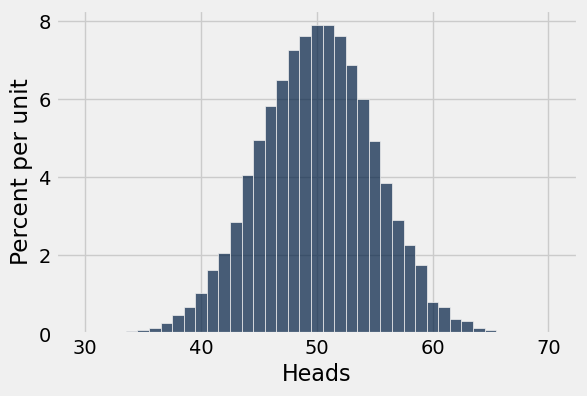

In [75]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

<br><br><br><br>

--- 
## Optional: Advanced `where`

Sometimes the `are.above_or_equal_to` style syntax will be painful to use.  We can instead construct an array of booleans to select rows from our table.  This will allow us to select rows based on complex boolean expressions spanning multiple columns. 

In [76]:
ages = make_array(16, 22, 18, 15, 19, 39, 27, 21)
patients = Table().with_columns("Patient Id", np.arange(len(ages))+1000, 'Age', ages,)
patients

Patient Id,Age
1000,16
1001,22
1002,18
1003,15
1004,19
1005,39
1006,27
1007,21


**Exercise:** Find all the patients that are older than 21 or have a Patient Id that is even:

In [77]:
older = patients.column("Age") > 21
older

array([False,  True, False, False, False,  True,  True, False], dtype=bool)

In [78]:
patients.where(older)

Patient Id,Age
1001,22
1005,39
1006,27


To compute the even patient ids, we can use the `%` modulus operator:

In [79]:
patients.column("Patient Id") % 2

array([0, 1, 0, 1, 0, 1, 0, 1])

In [80]:
even_ids = patients.column("Patient Id") % 2 == 0
even_ids

array([ True, False,  True, False,  True, False,  True, False], dtype=bool)

In [81]:
patients.where(even_ids)

Patient Id,Age
1000,16
1002,18
1004,19
1006,27


In [82]:
patients.where(even_ids | older)

Patient Id,Age
1000,16
1001,22
1002,18
1004,19
1005,39
1006,27
